In [9]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
import sqlite3
import time
%matplotlib inline

In [2]:
# Create your connection.
cnx = sqlite3.connect('greenhouse.db')
df = pd.read_sql_query("SELECT * FROM readings", cnx)


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7349 entries, 0 to 7348
Data columns (total 5 columns):
source           7349 non-null object
airtemp          7349 non-null float64
humidity         7349 non-null float64
soil_moisture    7349 non-null int64
timestamp        7349 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 287.1+ KB


,source,airtemp,humidity,soil_moisture,timestamp
0,84:0d:8e:b0:f4:5c,23.6,45.60,1,2020-01-27 22:16:40
1,dc:4f:22:5f:4b:27,17.4,89.95,1,2020-01-27 22:16:40
2,84:0d:8e:b0:f4:5c,23.6,45.60,1,2020-01-27 22:16:45
3,dc:4f:22:5f:4b:27,17.4,90.10,1,2020-01-27 22:16:45
4,dc:4f:22:5f:4b:27,17.4,90.20,1,2020-01-27 22:16:52


In [5]:
df.timestamp = pd.to_datetime(df.timestamp)
df.source = df.source.str.replace('84:0d:8e:b0:f4:5c', 'TipoA')
df.source = df.source.str.replace('dc:4f:22:5f:4b:27', 'TipoB')

BD = df[['Origen', 'Fecha','Temperatura', 'Humedad']]


In [7]:
BD.head()

,source,timestamp,airtemp,humidity
0,TipoA,2020-01-27 22:16:40,23.6,45.60
1,TipoB,2020-01-27 22:16:40,17.4,89.95
2,TipoA,2020-01-27 22:16:45,23.6,45.60
3,TipoB,2020-01-27 22:16:45,17.4,90.10
4,TipoB,2020-01-27 22:16:52,17.4,90.20


source
TipoA    AxesSubplot(0.125,0.125;0.775x0.755)
TipoB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: airtemp, dtype: object

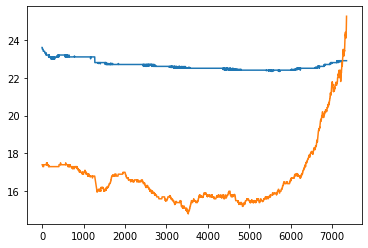

In [11]:
BD.groupby('Origen').Temperatura.plot()


source
TipoA    AxesSubplot(0.125,0.125;0.775x0.755)
TipoB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: humidity, dtype: object

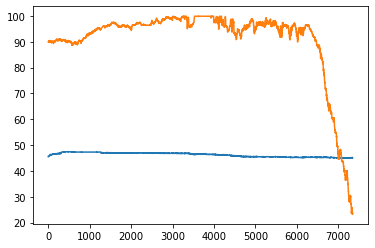

In [14]:
BD.groupby('Origen').Humedad.plot()